# Regressão Linear Simples e Regressão Linear Múltipla

## Sumário

* <a href="">Introdução</a>

---

<h2 id="#id1">1) Introdução</h2>

A regressão linear simples modela o relacionamento entre a magnitude de uma variável e aquela de uma segunda - por exemplo, conforme X aumenta, Y também aumenta. Ou conforme X aumenta, Y diminui. A correlação é outro jeito de medir como duas variáveis estão relacionadas. A diferença é que enquanto a correlação mede a força de uma associação entre duas variáveis, a regressão quantifica a natureza do relacionamento.

É um processo de Machine Learning supervisionado. É semelhante à classificação, mas, em vez de prever um rótulo, tentamos prever um valor contínuo. Se você estiver tentando prever um número, utilize a regressão.

* **Variável independente (x) -> Variável dependente (y)**<br/>
Análise de regressão é uma metodologia estatística que utiliza a relação entre duas ou mais variáveis quantitativas de tal forma que uma variável possa ser predita a partir de outra.

<h3 id="#id1_1">1.1) Termos-Chave</h3>

* **Resposta**: A variável que estamos tentando prever. *Sinônimos*: Variável dependente, variável Y, alvo, resultado.
* **Variável independente**: A variável usada para prever a resposta. *Sinônimos*: Variável X, característica, atributo.
* **Registro**: O vetor de valores preditor e de resultado para um indivíduo ou caso específico. *Sinônimos*: linha, caso, exemplo.
* **Intercepto**: O interceptor da linha de regressão - ou seja, o valor previsto quando X = 0. *Sinônimos*: b0, ß0.
* **Coeficiente de Regressão**: O declive da linha de regressão s. *Sinônimos*: declive, b1, ß1, estimativas de parâmetro, pesos.
* **Valores ajustados**: As estimativas Ŷi obtidas da linha de regressão. *Sinônimos*: Valores previstos.
* **Resíduo**: A diferença entre os valores observados e os valores ajustados. *Sinônimos*: erros.
* **Mínimos Quadrados**: O método de ajustar uma regressão pela minimização da soma dos quadrados dos resíduos. *Sinônimos*: mínimos quadrados ordinários.

---

<h2 id="#id2">2) A Equação de Regressão</h2>

A regressão linear simples estima exatamente o quanto Y mudará quando X mudar em uma certa quantidade. Com o coeficiente de correlação, as variáveis X e Y são intercambiáveis. Com a regressão, estamos tentando prever a variável Y a partir de X usando um relacionamento linear (ou seja, uma linha):

<img src="assets/00_linearRegression.jpg" alt="Fórmula da regressão linear" width="450">

Quando resolvida, temos um intercepto e um coeficiente. O intercepto nos dá um valor de base para uma predição, modificado pela soma do produto entre o coeficiente e o dado de entrada. Esse formato pode ser generalizado para dimensões maiores. Nesse caso, cada atributo terá um coeficiente. Quando maior o valor absoluto do coeficiente, mais impacto terá o atributo no alvo.

O modelo pressupõe que a predição é uma combinação linear dos dados de entrada. Para alguns conjuntos de dados, isso não será suficientemente flexível. Mais complexidade poderá ser acrescentada por meio da transformação dos atributos (o transformador `preprocessing.PolynomialFeatures` do sklearn é capaz de criar combinações polinomiais dos atributos). Se isso resultar em overfitting, regressões ridge e lasso poderão ser usadas para regularizar o estimador. 

Esse modelo também é suscetível a **heterocedasticidade**. A heterocedasticidade é a ideia de que, à medida que os valores de entrada mudam, o erro da predição (ou resíduos) geralmente muda também.

Outra questão que deve ser considerada é a **multicolinearidade**. Se as colunas tiverem um alto nível de correlação, será mais difícil interpretar os coeficientes. Em geral, isso não causará impactos no modelo, mas apenas no significado dos coeficientes.

<h3 id="#id2_1">2.1) Propriedades do modelo</h3>

Um modelo de regressão linear tem as seguintes propriedades:
* **Eficiência na execução**: Use n_jobs para melhorar o desempenho.
* **Pré-processamento dos dados**: Padronize os dados antes de fazer o treinamento do modelo.
* **Para evitar overfitting**: Você pode simplificar o modelo não usando ou adicionando atributos polinomiais.
* **Interpretação dos resultados**: É possível interpretar os resultados como pesos para contribuição dos atributos, mas supõe-se que os atributos tenham uma distribuição normal e sejam independentes. Você pode remover atributos colineares para facilitar a interpretação. R² informará até que ponto a variância total do resultado é explicada pelo modelo.

Parâmetros da instância:
* **n_jobs**: Número de CPUs a ser usadas. -1 se todas.

Atributos após a adequação:
* **coef_**: Coeficientes da regressão linear.
* **intercept_**: Intercepto do modelo linear.

O valor do **.intercept_** é o valor médio esperado. Podemos ver como o fato de escalar os dados afeta os coeficientes. O sinal dos coeficientes explica a direção da relação entre o atributo e o alvo (target). Um sinal positivo informa que, à medida que o atributo aumenta, o rótulo (label) aumenta. Um sinal negativo mmostra que, à medida que o atributo aumenta, o rótulo diminui. Quanto maior o valor absoluto do coeficiente, mais impacto ele causará.

<h3 id="#id2_2">2.2) Exemplo básico do algoritmo</h3>

In [1]:
import pandas as pd
from sklearn import model_selection, preprocessing

df = pd.read_csv('../data/bostonhousing.csv')
bos_X = df.drop(columns=['MEDV'])
bos_X = bos_X[['AGE']]
bos_y = df['MEDV']

display(bos_X.head(3))
display(bos_y.head(3))

for col in bos_X:
    bos_X[col].fillna(bos_X[col].median(), inplace=True)

bos_sX = preprocessing.StandardScaler().fit_transform(bos_X)
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = model_selection.train_test_split(bos_sX, bos_y, test_size=0.3, random_state=42)

,AGE
0,65.2
1,78.9
2,61.1


0    24.0
1    21.6
2    34.7
Name: MEDV, dtype: float64

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(bos_sX_train, bos_sy_train)
print(lr.score(bos_sX_test, bos_sy_test))
print(f"Coef: {lr.coef_}")
print(f"Intercept: {lr.intercept_}")

0.15388228824187467
Coef: [-3.40549831]
Intercept: 23.040506838183067


Alguns conceitos importantes na análise de regressão são os valores *ajustados* e *resíduos*. Em geral, os dados não ficam exatamente em linha, então a equação de regressão deveria incluir um termo explícito de erro ei.

Os valores ajustados, também chamados de valores *previstos*, são geralmente denotados por **Ŷ**. As notações de *b0(chapéu)* e *b1(chapéu)* indicam que os coeficientes são os estimados versus os conhecidos.

Notação Chapéu: Estimativas versus valores conhecidos. A notação "chapéu" é usada para diferenciar as estimativas dos valores conhecidos.

<h3 id="#id2_3">2.3) Mínimos Quadrados</h3>

Como o modelo é ajustado aos dados? Quando existe um relacionamento claro, pode-se imaginar ajustar a linha à mão. Na prática, a linha de regressão é a estiamtiva que minimiza a soma dos valores quadrados do resíduo, também chamados de *residual sum of squares* ou RSS:

<img src="assets/01_residual_sum_squares.png" alt="RSS" width="400">

As estimativas b0 (chapéu) e b1 (chapéu) são os valores que minimizam a RSS. O método de minizar a soma dos resíduos quadrados é chamado de regressão de mínimos quadrados, ou regressão de mínimos quadrados ordinários (Ordinary Least Squares - OLS). 

Os quadrados mínimos, como média, são sensíveis aos outliers, porém isso costuma ser um problema significativo apenas em problemas pequenos ou de tamanho moderado.

<h3 id="#id2_4">2.4) Previsão versus Explicação (Profiling)</h3>

Historicamente, um dos primeiros usos da regressão era desvendar um suposto relacionamento linear entre as variáveis preditoras e uma variável resultante. O objetivo tem sido entender um relacionamento e explicá-lo usandos os dados para os quais a regressão foi ajustada. 

Nesse caso, o objetivo principal está no declive estimado da equação de regressão, b(chapéu). Ou seja, de modo geral, o objetivo não é prever casos individuais, mas, sim, entender o relacionamento geral.

---

<h2 id="#id3">3) Regressão Linear Múltipla</h2>

Quando existem múltiplas preditoras, a equação simplesmente se estende para acomodá-las:

<img src="assets/02_multiple_linear_regression.png" alt="Multiple Linear Regression" width="400">

Em vez de uma linha, agora temos um modelo linear - o relacionamento entre cada coeficiente e sua variável (característica) é linear.

<h3 id="#id3_1">3.1) Termos-Chave</h3>

* **Raiz quadrada do erro quadrático médio**: A raiz quadrada do erro quadrático médio de regressão (esta é a métrica mais usada para comparar modelos de regressão). *Sinônimo*: RMSE.
* **Erro-padrão residual**: O mesmo qua a raiz quadrada do erro quadrático médio, mas ajustada para graus de liberdade. *Sinônimo*: RSE.
* **R-quadrado**: A proporção de variância explicada pelo modelo, de 0 a 1. *Sinônimos*: Coeficiente de determinação, R2.
* **Estatística-t**: O coeficiente para um preditor, dividido pelo erro-padrão do coeficiente, fornecendo uma métrica para comparar a importância das variáveis no modelo.
* **Regressão ponderada**: A regressão com os registros tendo pesos diferentes.

Todos os outros conceitos em regressão linear simples, como ajuste por mínimos quadrados e a definição de valores ajustados e resíduos, se estendem à configuração da regressão linear múltipla.

<h3 id="#id3_2">3.2) Exemplo básico do algoritmo</h3>

In [2]:
import pandas as pd
from sklearn import model_selection, preprocessing

df = pd.read_csv('../data/bostonhousing.csv')
bos_X = df.drop(columns=['MEDV'])
bos_y = df['MEDV']

display(bos_X.head(3))
display(bos_y.head(3))

for col in bos_X:
    bos_X[col].fillna(bos_X[col].median(), inplace=True)

bos_sX = preprocessing.StandardScaler().fit_transform(bos_X)
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = model_selection.train_test_split(bos_sX, bos_y, test_size=0.3, random_state=42)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03


0    24.0
1    21.6
2    34.7
Name: MEDV, dtype: float64

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(bos_sX_train, bos_sy_train)
print(lr.score(bos_sX_test, bos_sy_test))

coefs = pd.DataFrame(list(zip(bos_X.columns, lr.coef_)), columns=['Atributo', 'Peso'])
print("Coefs:")
display(coefs)
print(f"Intercept: {lr.intercept_}")

0.707643863232741
Coefs:


,Atributo,Peso
0,CRIM,-1.067488
1,ZN,0.698338
2,INDUS,-0.053129
3,CHAS,0.936162
4,NOX,-1.606479
5,RM,3.076974
6,AGE,-0.668085
7,DIS,-2.960249
8,RAD,1.657826
9,TAX,-1.193402


Intercept: 22.502241446611375


Podemos utilizar o pacote `yellowbrick` para visualizar os coeficientes. Como os dados do conjunto de dados escalados não são um DataFrame pandas, mas um array numpy, é necessário passar o parâmetro *labels* se quisermos usar os nomes das colunas:

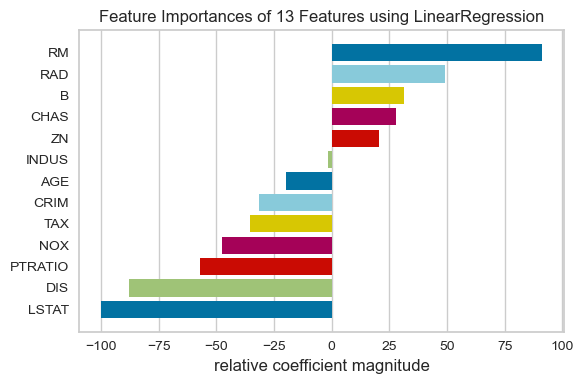

<Axes: title={'center': 'Feature Importances of 13 Features using LinearRegression'}, xlabel='relative coefficient magnitude'>

In [4]:
from yellowbrick.features import FeatureImportances
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(lr, labels=bos_X.columns)
fi_viz.fit(bos_sX, bos_y)
fi_viz.poof()

### **Ver conteúdo do livro de estatística**
### **Ver conteúdo do curso de Machine Learning DSA**